# Ford GoBike System Dateset Exploration

## by  YIJJIE  ZHANG


## Preliminary Wrangling

### Ford GoBike System Dateset is a dateset that contains trip data from lyft's bike service for public use. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Variables including, trip duration, start time and end time with date, start station and end station names, start and end coordinates, customer type.

In [92]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from requests import get
from zipfile import ZipFile
from io import StringIO, BytesIO
%matplotlib inline

In [93]:
# after downloading and unzip the file from website, then upload the file into file name 'anaconda 3'
df2017 = pd.read_csv('2017-fordgobike-tripdata.csv')
df2017.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [94]:
df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [95]:
df2017.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [96]:
# The value counts of user_type
df2017.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [98]:
# download and read data from the first month of 2018 
df201801 = pd.read_csv('201801-fordgobike-tripdata.csv')
df201801.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No


In [99]:
df201801.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  bike_share_for_all_trip  94802 non-null  object 
dtypes: float64(4), int64(4

In [100]:
# continue to download and read month data of 2018
df201802 = pd.read_csv('201802-fordgobike-tripdata.csv')
df201802.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6,The Embarcadero at Sansome St,37.804770,-122.403234,324,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No


In [101]:
df201802.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106718 entries, 0 to 106717
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             106718 non-null  int64  
 1   start_time               106718 non-null  object 
 2   end_time                 106718 non-null  object 
 3   start_station_id         106718 non-null  int64  
 4   start_station_name       106718 non-null  object 
 5   start_station_latitude   106718 non-null  float64
 6   start_station_longitude  106718 non-null  float64
 7   end_station_id           106718 non-null  int64  
 8   end_station_name         106718 non-null  object 
 9   end_station_latitude     106718 non-null  float64
 10  end_station_longitude    106718 non-null  float64
 11  bike_id                  106718 non-null  int64  
 12  user_type                106718 non-null  object 
 13  bike_share_for_all_trip  106718 non-null  object 
dtypes: f

In [102]:
# continue to download and read month data of 2018
df201803 = pd.read_csv('201803-fordgobike-tripdata.csv')

In [103]:
# continue to download and read month data of 2018
df201804 = pd.read_csv('201804-fordgobike-tripdata.csv')

In [106]:
# continue to download and read month data of 2018
df201805 = pd.read_csv('201805-fordgobike-tripdata.csv')

In [107]:
# continue to download and read month data of 2018
df201806 = pd.read_csv('201806-fordgobike-tripdata.csv')

In [108]:
# continue to download and read month data of 2018
df201807 = pd.read_csv('201807-fordgobike-tripdata.csv')

In [109]:
# continue to download and read month data of 2018
df201808 = pd.read_csv('201808-fordgobike-tripdata.csv')

In [110]:
# continue to download and read month data of 2018
df201809 = pd.read_csv('201809-fordgobike-tripdata.csv')

In [111]:
# continue to download and read month data of 2018
df201810 = pd.read_csv('201810-fordgobike-tripdata.csv')

In [112]:
# continue to download and read month data of 2018
df201811 = pd.read_csv('201811-fordgobike-tripdata.csv')

In [113]:
# continue to download and read month data of 2018
df201812 = pd.read_csv('201812-fordgobike-tripdata.csv')

In [114]:
# merge the month data and get the first season data
df2018s1 = pd.concat([df201801,df201802,df201803],axis=0,ignore_index=True)

In [115]:
df2018s1.shape

(312902, 14)

In [116]:
# merge the month data and get the second season data
df2018s2 = pd.concat([df201804,df201805,df201806],axis=0,ignore_index=True)

In [117]:
df2018s2.shape

(506262, 14)

In [118]:
# merge the month data and get the third season data
df2018s3 = pd.concat([df201807,df201808,df201809],axis=0,ignore_index=True)

In [119]:
df2018s3.shape

(577601, 14)

In [120]:
# merge the month data and get the forth season data
df2018s4 = pd.concat([df201810,df201811,df201812],axis=0,ignore_index=True)

In [121]:
df2018s4.shape

(466956, 14)

In [122]:
# merge the four season data and get the year data
df2018 = pd.concat([df2018s1,df2018s2,df2018s3,df2018s4],axis=0,ignore_index=True)

In [123]:
df2018.shape

(1863721, 14)

In [124]:
df2018.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No


In [125]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [126]:
# download and read data from the first month of 2019 
df201901 = pd.read_csv('201901-fordgobike-tripdata.csv')
df201901.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No


In [127]:
# continue to download and read month data of 2019
df201902 = pd.read_csv('201902-fordgobike-tripdata.csv')
df201902.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,No


In [128]:
# continue to download and read month data of 2019
df201903 = pd.read_csv('201903-fordgobike-tripdata.csv')

In [129]:
# continue to download and read month data of 2019
df201904 = pd.read_csv('201904-fordgobike-tripdata.csv')

In [130]:
# continue to download and read month data of 2019
df201905 = pd.read_csv('201905-baywheels-tripdata.csv')

In [131]:
# continue to download and read month data of 2019
df201906 = pd.read_csv('201906-baywheels-tripdata.csv')

C:\Users\nancy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [132]:
# continue to download and read month data of 2019
df201907 = pd.read_csv('201907-baywheels-tripdata.csv')

C:\Users\nancy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [133]:
# continue to download and read month data of 2019
df201908 = pd.read_csv('201908-baywheels-tripdata.csv')

In [134]:
# continue to download and read month data of 2019
df201909 = pd.read_csv('201909-baywheels-tripdata.csv')

In [135]:
# continue to download and read month data of 2019
df201910 = pd.read_csv('201910-baywheels-tripdata.csv')

In [136]:
# continue to download and read month data of 2019
df201911 = pd.read_csv('201911-baywheels-tripdata.csv')

In [137]:
# continue to download and read month data of 2019
df201912 = pd.read_csv('201912-baywheels-tripdata.csv')

C:\Users\nancy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [138]:
# merge the month data and get the first season data
df2019s1 = pd.concat([df201901,df201902,df201903],axis=0,ignore_index=True)

In [139]:
df2019s1.shape

(631793, 14)

In [140]:
# merge the month data and get the second season data
df2019s2 = pd.concat([df201904,df201905,df201906],axis=0,ignore_index=True)

In [141]:
df2019s2.shape

(613046, 15)

In [142]:
# merge the month data and get the third season data
df2019s3 = pd.concat([df201907,df201908,df201909],axis=0,ignore_index=True)

In [143]:
df2019s3.shape

(686651, 15)

In [144]:
# merge the month data and get the forth season data
df2019s4 = pd.concat([df201910,df201911,df201912],axis=0,ignore_index=True)

In [145]:
df2019s4.shape

(575493, 15)

In [146]:
# merge the four season data and get the year data
df2019 = pd.concat([df2019s1,df2019s2,df2019s3,df2019s4],axis=0,ignore_index=True)

In [147]:
df2019.shape

(2506983, 15)

In [148]:
df2019.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [149]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


## Cleaning Data

### 1. Get a master dataframe

In [150]:
# issue: the columns of these dataframes are different, need to merge into a master dataframe

# drop the last column 'bike_share_for_all_trip' in df2018
# this column does not exist in df2017
df2018 = df2018.drop(columns = ['bike_share_for_all_trip'],axis = 0)

# Test
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
dtypes: float64(6), int64(2), object(5)
memory usage: 184.8+ MB


In [151]:
df2019 = df2019.drop(columns = ['bike_share_for_all_trip'],axis = 0)
# Test
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  rental_access_method     object 
dtypes: float64(6), int64(2), object(6)
memory usage: 267.8+ MB


In [152]:
# column 'rental_access_method' is a new column which do not exist in df2018
# to see the value of this column
df2019.rental_access_method.value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

In [154]:
# drop this column in order to merge into df2018
# df2019 has the column 'rental_access_method'
# df2019new does not have the column 'rental_access_method'

df2019new = df2019.drop(columns = ['rental_access_method'],axis = 0)
# Test
df2019new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
dtypes: float64(6), int64(2), object(5)
memory usage: 248.6+ MB


In [155]:
# To save as a csv file for analysis by EXCEL
df2018.to_csv('df2018.csv',index=None)

In [156]:
# To save as a csv file for analysis by EXCEL
df2019new.to_csv('df2019new.csv',index=None)

In [157]:
# merge df2017, df2018 and df2019new into a master dataframe
df_all = pd.concat([df2017,df2018,df2019new],axis=0,ignore_index=True)

In [158]:
df_all.shape

(4890404, 13)

In [159]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890404 entries, 0 to 4890403
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
dtypes: float64(6), int64(2), object(5)
memory usage: 485.0+ MB


In [160]:
# copy a clean version of dataframe
df = df_all

### 2. Create the distance data

In [161]:
# issue: the latitude/longtitude raw data is not straightward for people to use and understand
#        need to transform the data to show the distance of bikes using

# copied from "Getting distance between two points based on latitude/longitude" on stackoverflow
# https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
from math import sin, cos, sqrt, atan2, radians

def distance (lat1,lon1,lat2,lon2):
    R = 6373.0
    
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return np.float64(round(1000*distance))

In [162]:
# create a new column 'distance'
df['distance'] = df.apply(lambda row: distance(row['start_station_latitude'],row['start_station_longitude'],row['end_station_latitude'],row['end_station_longitude']),axis=1)

### 3. Change the riding time unit

In [167]:
# issue: the unit of seconds makes the number is too large and it is not common for user to analysis

# change the unit to minutes
df['duration_min'] = df.duration_sec/60

In [168]:
# test
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,distance,duration_min
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,943.0,1335.166667
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,3071.0,1313.333333
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,0.0,762.800000


### 4. Change the datatype of time

In [169]:
# issue: the data type of starting_time and end_time are object
#        which makes it hard to get the accurate information from the values.

# transform data types of columns "start_time" and "end_time" 
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)

In [170]:
# test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890404 entries, 0 to 4890403
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  distance                 float64       
 14  duration_min             float64       
dtypes: datetime64[ns](2), float64(8), int64(2), object(3)
memory usage: 559.7+ MB


In [171]:
df.shape

(4890404, 15)

In [172]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,distance,duration_min
count,4.890404e+06,4.797899e+06,4.890404e+06,4.890404e+06,4.795731e+06,4.890404e+06,4.890404e+06,4.890404e+06,4.890404e+06,4.890404e+06
mean,8.575342e+02,1.305733e+02,3.776642e+01,-1.223511e+02,1.277565e+02,3.776605e+01,-1.223488e+02,1.535467e+04,1.886919e+03,1.429224e+01
std,2.325582e+03,1.121170e+02,1.207978e-01,2.461166e-01,1.114309e+02,1.854781e-01,5.182455e-01,8.306346e+04,5.551190e+04,3.875971e+01
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00,0.000000e+00,1.000000e+00
25%,3.580000e+02,3.700000e+01,3.777041e+01,-1.224117e+02,3.000000e+01,3.777100e+01,-1.224113e+02,1.443000e+03,8.980000e+02,5.966667e+00
50%,5.680000e+02,9.300000e+01,3.778095e+01,-1.223983e+02,9.000000e+01,3.778107e+01,-1.223974e+02,2.779000e+03,1.414000e+03,9.466667e+00
75%,8.860000e+02,2.000000e+02,3.779539e+01,-1.222914e+02,1.970000e+02,3.779539e+01,-1.222935e+02,4.731000e+03,2.167000e+03,1.476667e+01
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05,1.280375e+07,1.520183e+04


## What is the structure of the dataset?

### This is a big dataset containing 3 year data (4,890,404 rows and 15 columns). Variables included duration time, start time, end time, start station,end station names, start and end coordinates, customer type,etc.

## What are the main features of interest in the dataset?

### I am interested in two main features:  Firstly, does user types impact the riding service？ This is key for the company to carry out its customer service method. Secondly, when is the exactly most rush specific time of everyday, every week and every month? This is important for the company to better arrange its employee and bike resource. 
    

## What features in the dataset will help support investigation into the feature(s) of interest?


### User type in the dataset tells the customer information. The latitude and longtitude give us information of the distance between starting and ending station. The duration time help support investigate into the service time of bikes.

## Univariate Exploration

In [173]:
# get year data
df['year'] = df.start_time.dt.year
df['year'].value_counts()

2019    2506983
2018    1863721
2017     519700
Name: year, dtype: int64

In [174]:
# get month data
df['month'] = df.start_time.dt.month
df['month'].value_counts()

10    550290
9     502761
7     501397
8     486017
11    415243
6     390429
4     370280
12    368004
3     367681
5     361288
2     290130
1     286884
Name: month, dtype: int64

In [175]:
# get day data
df['day'] = df.start_time.dt.day
df['day'].value_counts()

12    177738
11    173875
19    173412
7     166031
13    165428
20    165081
18    163510
10    163397
8     162917
26    161749
9     161288
25    161264
17    161255
14    161056
5     160955
6     160522
23    159205
22    158705
21    158528
28    157937
4     157135
24    155466
30    154954
27    154758
3     151948
15    150481
16    149382
29    149269
1     148451
2     146266
31     98441
Name: day, dtype: int64

In [176]:
# get hour data
df['hour'] = df.start_time.dt.hour
df['hour'].value_counts()

17    576956
8     542588
18    451010
9     422308
16    377637
19    274452
7     270692
15    250120
12    231752
13    226881
10    219481
14    216264
11    207008
20    175491
21    124012
6      98828
22     83435
23     49905
0      27526
5      25651
1      16049
2      10239
4       6822
3       5297
Name: hour, dtype: int64

In [177]:
# Test to see if the df has the new columns 'year', 'month', 'day' and 'hour'
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,distance,duration_min,year,month,day,hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,943.0,1335.166667,2017,12,31,16
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,3071.0,1313.333333,2017,12,31,15
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,0.0,762.800000,2017,12,31,22
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,1047.0,1036.200000,2017,12,31,17
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,637.0,726.716667,2017,12,31,14


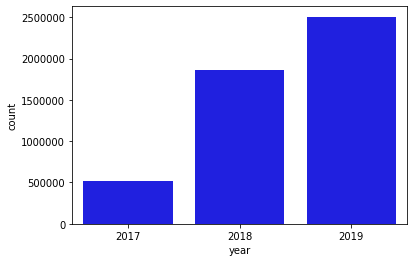

In [179]:
# the histogram of year
sns.countplot(data = df, x = 'year',color = 'blue')

#### Observation:The riding count incraesed drmatically from year 2017 to 2018, then gain moderately in 2019. This is a good sign for the company.    

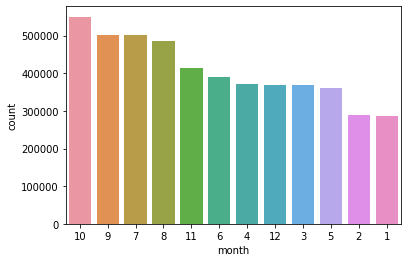

In [181]:
# the histogram of month
month_order = df['month'].value_counts().index
sns.countplot(data = df, x = 'month', order = month_order)

#### Observation: From the month perspective, September and October are the two busiest month of the years. Then comes July and August. Obviously, summer and autumn  are the best seasons to enjoy outdoor riding.

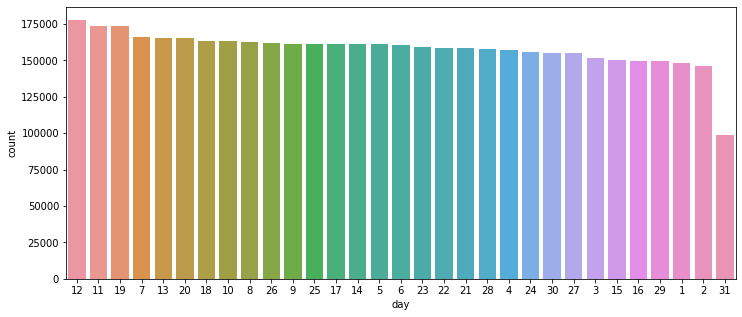

In [182]:
# the histogram of day
plt.figure(figsize = [12, 5])
day_order = df['day'].value_counts().index
sns.countplot(data = df, x = 'day', order = day_order)

#### Observation: The riding happened evevly during every month if I dropped out the outlier of the 31rd. In other words, during the 30 days of every month, the riding frequency did not change much.Furtherly,I think this is not the real life difference.The outlier happened just because only about 6 months has the 31rd, other months has not the 31rd. The calendar reason causes the strange value of 31rd. 

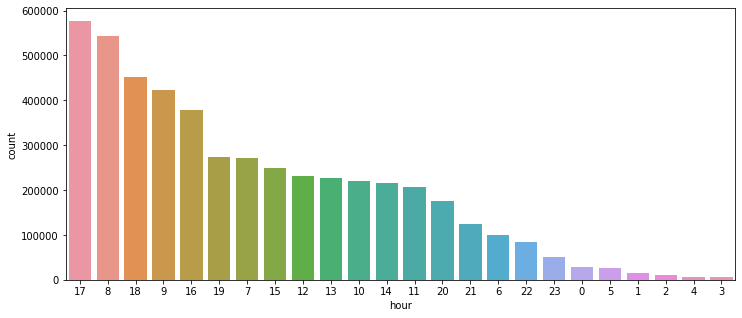

In [183]:
# the histogram of hour
plt.figure(figsize = [12, 5])
hour_order = df['hour'].value_counts().index
sns.countplot(data = df, x = 'hour', order = hour_order)

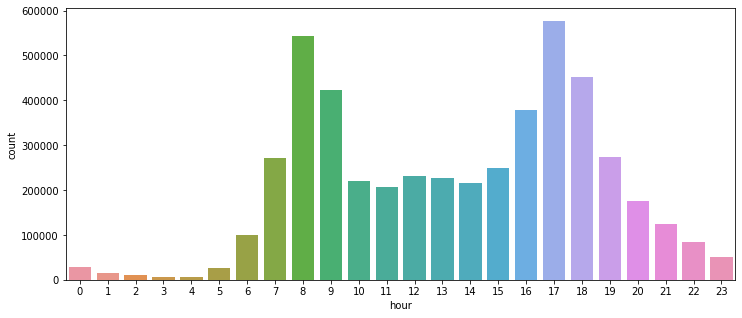

In [186]:
# the above histogram show the y axis value from high to low
# the below histogramthe shows x axis value from low to high 

plt.figure(figsize = [12, 5])
sns.countplot(data = df, x = 'hour')

#### Observation: There are two peaks in everyday operation. One is 8-9am and the other is 17-18pm. This is in line with the common working hours. It is natural to have the lowest count from 0 to 5 in late night.

## Distance graph

Text(0.5, 0, 'Distance')

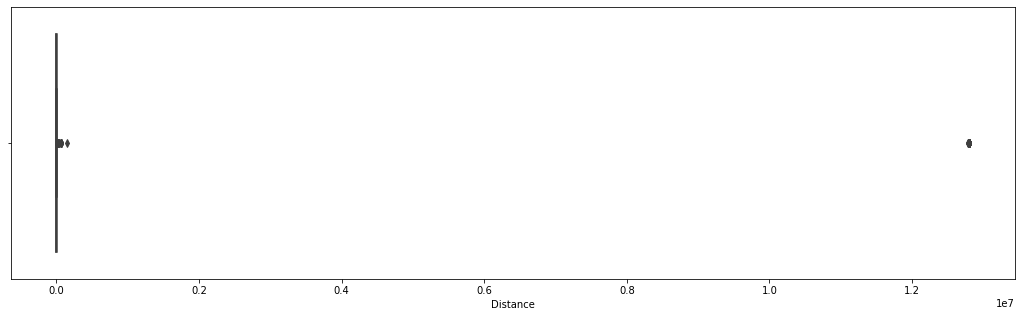

In [187]:
# Distance boxplot

plt.figure(figsize = [18, 5])
sns.boxplot(data = df, x = 'distance')
plt.xlabel('Distance')

Text(0.5, 0, 'Distance')

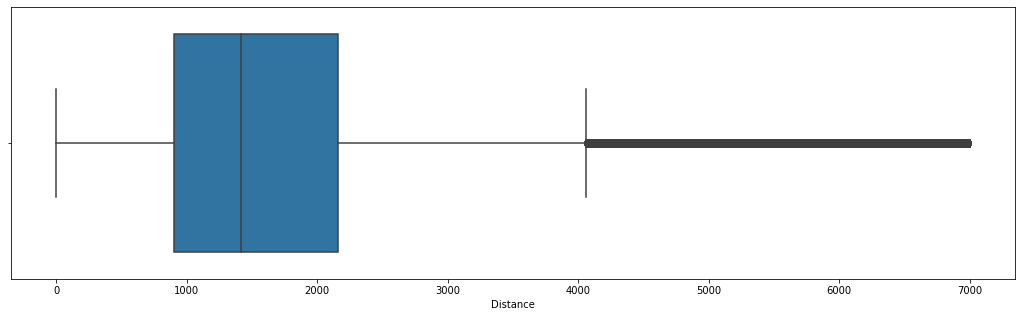

In [188]:
# the above graph shows the outliers that makes the boxplot hard to read
# since 75% percentiles is 2167
# zoom in the picture by limit the values

plt.figure(figsize = [18, 5])
sns.boxplot(data = df.query('distance <=7000'), x = 'distance')
plt.xlabel('Distance')

(array([ 388473., 1081560., 1153357.,  822426.,  571792.,  337201.,
         226867.,  144538.,   77829.,   40082.,   19876.,   10574.,
           6569.,    4615.]),
 array([   0,  500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000,
        5500, 6000, 6500, 7000]),
 <a list of 14 Patch objects>)

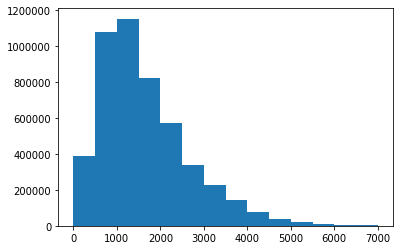

In [189]:
# distance histogram

bin_edges = np.arange(0, 7000+500, 500)
plt.hist(data = df, x ='distance', bins = bin_edges)

#### Observations: when considerring bike riding distance, we can see there is a maxium value of 12,803,570. While most values are under 4000. By zoom in the graph, I find 75% values are 2167. Interstingly, the minimun value is 0, which means some users rent bikes but did not used them.

## duration_min graph

Text(0.5, 0, 'Duration Minute')

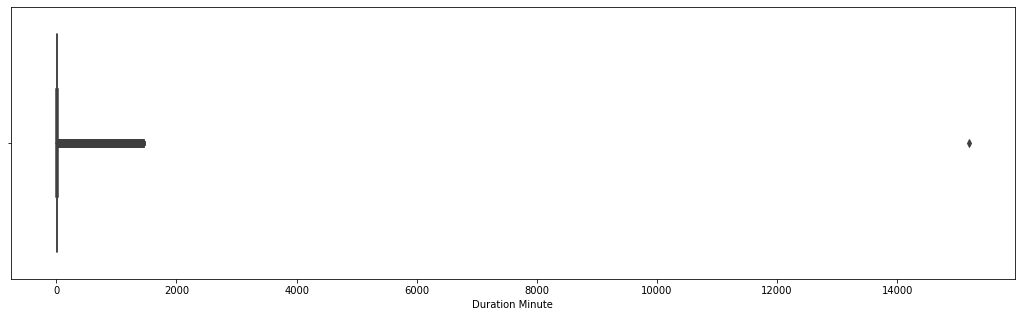

In [190]:
# The box plot of duration_min

plt.figure(figsize = [18, 5])
sns.boxplot(data = df, x = 'duration_min')
plt.xlabel('Duration Minute')

Text(0.5, 0, 'Duration Minute')

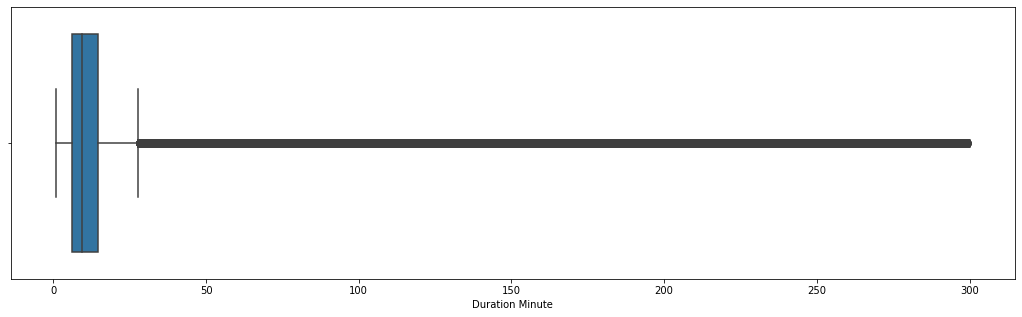

In [191]:
# zoom in the above graph to see more detail

plt.figure(figsize = [18, 5])
sns.boxplot(data = df.query('duration_min <= 300'), x = 'duration_min')
plt.xlabel('Duration Minute')

Text(0.5, 0, 'Duration Minute')

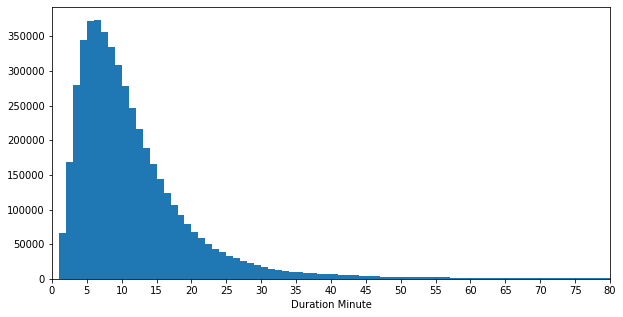

In [192]:
# duration_min histogram

plt.figure(figsize = [10, 5])
bin_edges = np.arange(0, df['duration_min'].max()+1, 1)
ticks = np.arange(0, 100, 5)
plt.hist(data = df, x = 'duration_min', bins = bin_edges);
plt.xticks(ticks, ticks);
plt.xlim(0,80)
plt.xlabel('Duration Minute')

#### Observations: when considerring duration minutes, we can see there is a maxium value (1520 minutes =25.33 hours). While most values are under 2000 minutes. By zoom in the graph, I find 75% values are under 14.76 minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

#### Rush hours: There are two peaks in everyday operation. One is 8-9am and the other is 17-18pm. This is in line with the working hours.  
#### From the month perspective, September and October are the two busiest month of the years. Maybe these are the best season to enjoy riding.
#### Busiest day: The riding happened evevly during every month if I dropped out the outlier of the 31rd. In other words, during the 30 days of every month, the riding frequency did not change much.Furtherly,I think this is not the real life difference.The outlier happened just because only about 6 months has the 31rd, other months has not the 31rd. The calendar reason causes the strange value of 31rd. 

#### I did not perform transformations except for drop some outliers when creating graph.

### Of the features investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

#### Unusual distributions of riding hours: From the above duration_min instogram, I can see most rides lasted between 5 to 10 minutes and a few rides lasted more than 60 minutes. 25% rides lasted more than 14.8 minutes.I also notice there are some strange outliers, like the max value is 1520 minutes (25.33 hours). This is a very interesting number since nobody would rent a bike and keep on riding for more than 24 hours. I guess a possible reason is some customers did not remember to return their bikes until the next day.
#### Yes, I changed the form of starting time and ending time to make them easier for further analysis. I also adjust the form of longtitude and latitude, creating the distance varible to analyse the riding distance.

# Bivariate Exploration

### 1. Graph of user_type vs distance

(-721463.7331743045, 13459684.187405989)

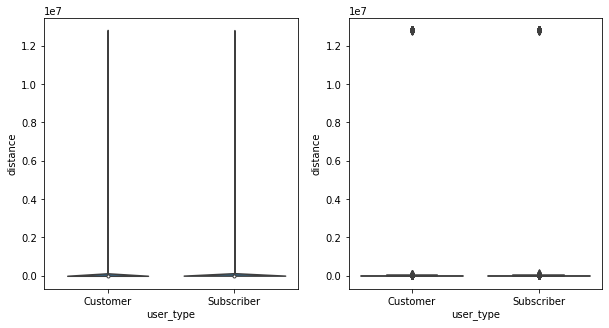

In [193]:
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = df,  x = 'user_type', y = 'distance', color = base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = df,  x = 'user_type', y = 'distance', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

(-910.1875923742625, 15833.187592374263)

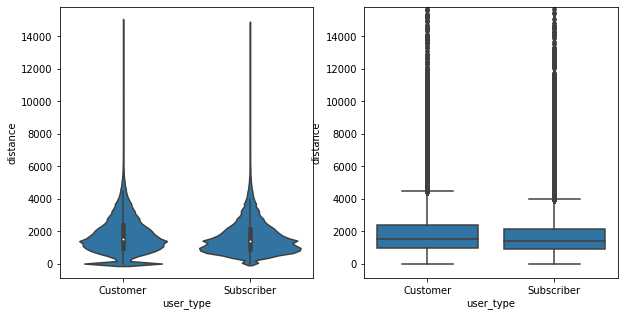

In [194]:
# zoom in the plot by limiting the outliers of y axis
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = df.query('distance <= 15000'),  x = 'user_type', y = 'distance', color = base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = df,  x = 'user_type', y = 'distance', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

#### observations:  There are not much difference between customer gruoup and subscriber group when considerring their riding distance. they have similar means and percentiles. The only difference is customer gruoup has a few bigger outliers than the subscriber group has. This might indicate whether subscribing or not does not impact peoples' riding behavior. The possible reason is renting cost is not a big deal for most customers. 


### 2. Graph of duration_min vs types of users

(-848.8561173030912, 15976.497818197427)

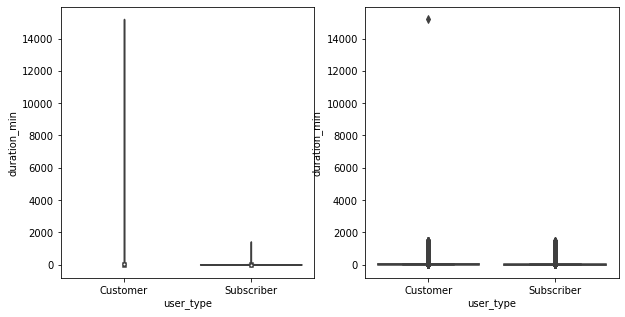

In [143]:
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = df,  x = 'user_type', y = 'duration_min', color = base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = df,  x = 'user_type', y = 'duration_min', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

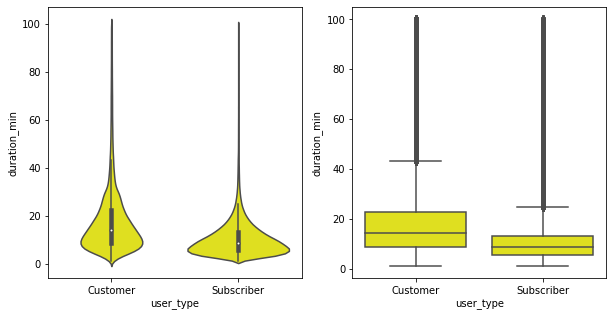

In [144]:
# zoom in the plot by limiting the outliers of y axis
plt.figure(figsize = [10, 5])

# left plot: violin plot
plt.subplot(1, 2, 1)
sns.violinplot(data = df.query("duration_min <= 100"),  x = 'user_type', y = 'duration_min', color = 'yellow')

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = df.query("duration_min <= 100"),  x = 'user_type', y = 'duration_min', color = 'yellow')


#### observations:  The median riding time of customer group is slightly higher than that of the subscriber group, which is a bit controdict to our institution. The maxium values for both groups are almost the same. This might indicate subscribing service does not necessarily increase the riding time.The possible reason is people use the service just for actual needs. Subscribers would not ride more frequently than other customers. 

## 3. Scatter plot of duration_min vs distance

Text(0, 0.5, 'distance')

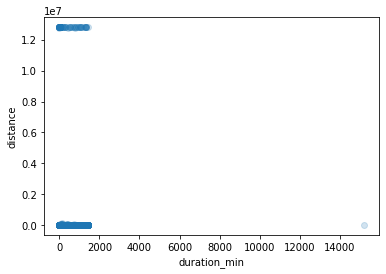

In [155]:
plt.scatter(data = df, x = 'duration_min', y = 'distance',alpha = 1/5)
plt.xlabel("duration_min")
plt.ylabel("distance")

Text(0, 0.5, 'distance')

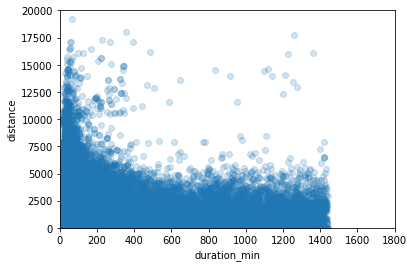

In [154]:
# zoom in the above graph by dropping out the outliers
plt.scatter(data = df, x = 'duration_min', y = 'distance',alpha = 1/5)
plt.xlim(0,1800)
plt.ylim(0,20000)
plt.xlabel("duration_min")
plt.ylabel("distance")

#### observations:  When riding time (duration_min) increases, the distance would not have linear increasement. Most riding distance happen under 15000. This is interesting bacause I assumed the two factors may had positively linear relationship.


## 4. Line graph of distance vs month

Text(0, 0.5, 'distance sum')

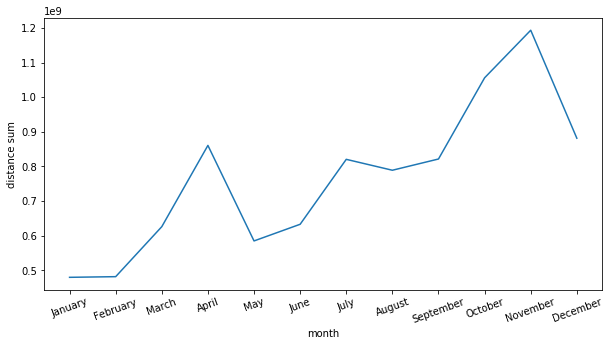

In [195]:
plt.figure(figsize = [10, 5])
df.groupby(df.start_time.dt.month).distance.sum().plot()
plt.xticks([1,2, 3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March','April','May','June','July','August','September','October','November','December'],
           rotation=20)
plt.xlabel('month')
plt.ylabel('distance sum')

#### Observations: From January to April, the riding distance increases steadily. After April, it dropped temporarily for only one month then moved up gradually to the peak on November. Then it decreased  in the last month during the peiod of three years.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

#### Distance vs Month. From January to April, the riding distance increases steadily. After April, it soared amazingly and reached the peak on October. Then it decreased  in the last three months of the two years.
#### Riding time vs customer group. The median riding time of customer group is slightly higher than that of the subscriber group, which is a bit controdict to our institution. The maxium values for both groups are almost the same. This might indicate subscribing service does not necessarily increase the riding time.The possible reason is people use the service just for actual needs. Subscribers would not ride more frequently than other customers.
#### Riding distance vs customer group. There are not much difference between customer gruoup and subscriber group when considerring their riding distance. they have similar means and percentiles. The only difference is customer gruoup has a few bigger outliers than the subscriber group has. This might indicate whether subscribing or not does not impact peoples' riding behavior. The possible reason is renting cost is not a big deal for most customers. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

#### Interesting relationships between riding time and riding distance: When riding time (duration_min) increases, the distance would not have linear increasement. Most riding distance happen under 15000. This is interesting bacause I assumed the two factors may had positively linear relationship.

# Multivariate Exploration

C:\Users\nancy\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(0, 100)

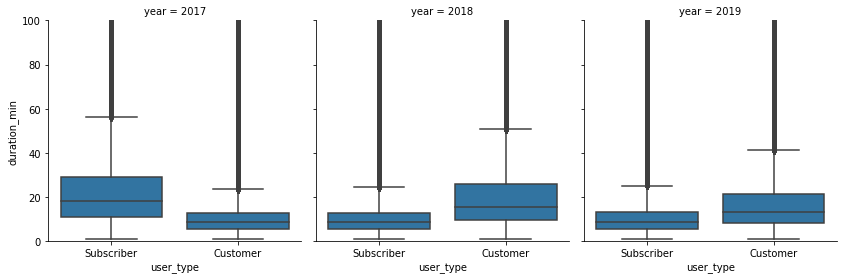

In [196]:
# Box plots of  duration_min calssified by user_types in different years
g = sns.FacetGrid(data = df, col = 'year', height = 4)
g.map(sns.boxplot, 'user_type', 'duration_min')
plt.ylim(0,100)

#### Observations: Only in 2017 the mean riding time of subscribers is larger than that of customers, and the height of box (IQR) is bigger. But things changed in 2018 and 2019. Customers' mean riding time is slightly higher than that of subscribers in these two years, and the IQR of subscribers is smaller than that of customers.  

<Figure size 1296x360 with 0 Axes>

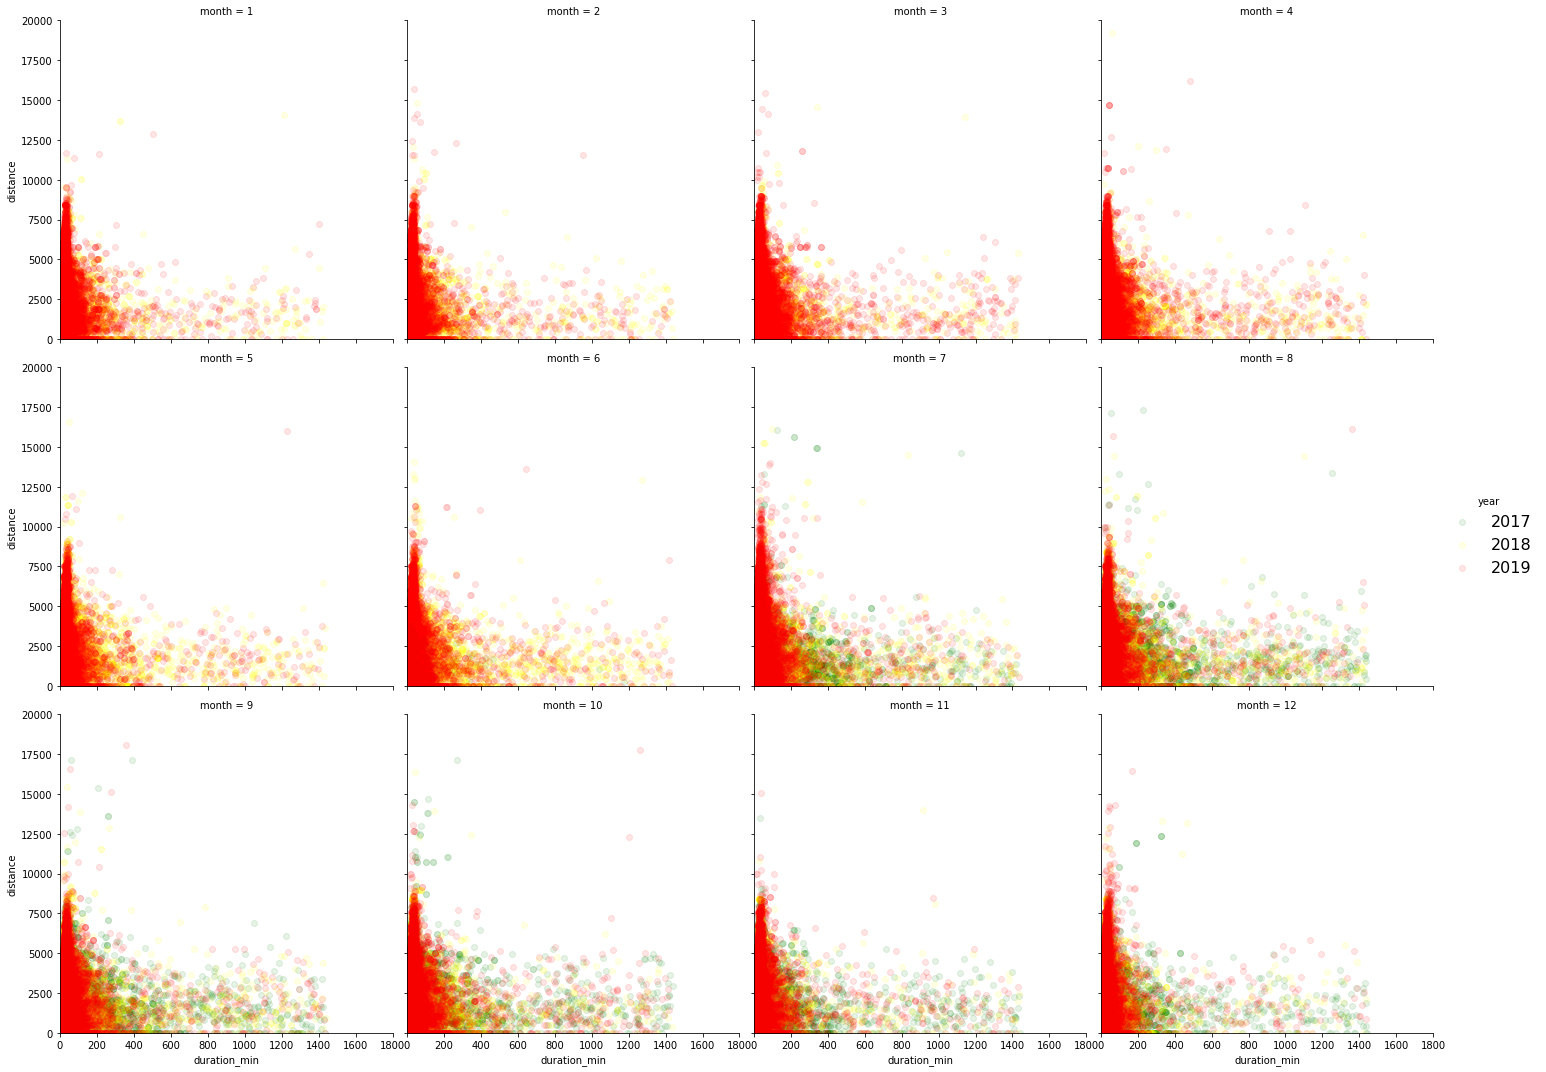

In [209]:
# scatter plots of duration_min and distance calssified by months and years
plt.figure(figsize = [18, 5])
#paa = dict(2017 = "seagreen", 2018 = "gray", 2019 = "red")
g = sns.FacetGrid(data = df, col = 'month', col_wrap = 4, height = 5, hue = 'year',hue_kws=dict(color=["green", "yellow", "red"]))
g.map(plt.scatter, 'duration_min', 'distance', alpha = 1/10);
plt.ylim(0,20000)
plt.xlim(0,1800)
g.add_legend(fontsize = 16)

#### Observations: These 12 pictures does not show much differences. The distribution of varibles are similar to those bivariate exploration. One noticeable point is in July and August, more outliers happen for 2017 data.

Text(0, 0.5, 'Distance')

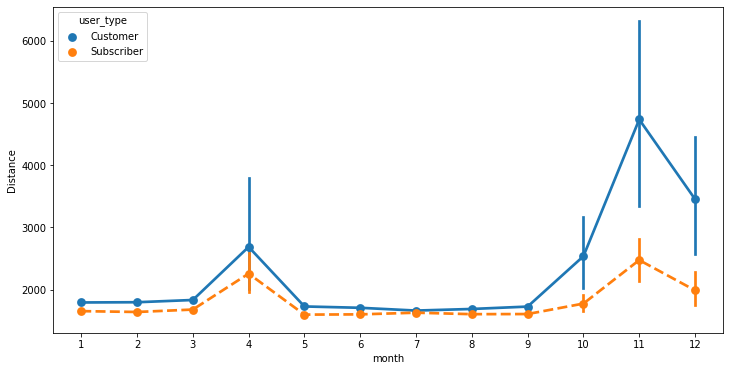

In [213]:
plt.figure(figsize = [12, 6])
sns.pointplot(data=df, x='month', y='distance', hue='user_type', linestyles=["-", "--"])
plt.xlabel('month')
plt.ylabel('Distance')


#### Observation: the two line show similar trend while customer gruoup has bigger variance.

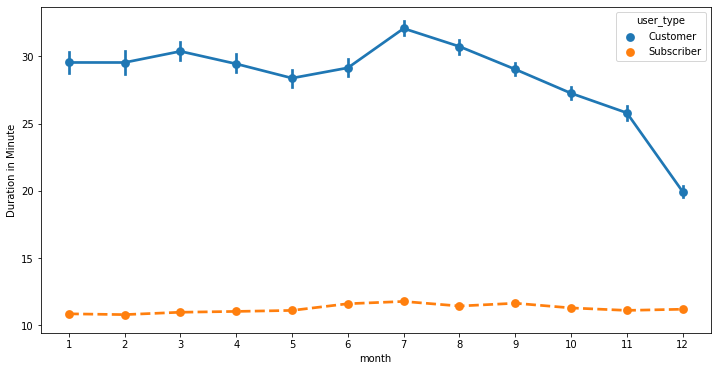

In [212]:
plt.figure(figsize = [12, 6])
sns.pointplot(data=df, x='month', y='duration_min', hue='user_type', linestyles=["-", "--"]);
plt.xlabel('month');
plt.ylabel('Duration in Minute');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

#### Duration minutes. Only in 2017 the mean riding time of subscribers is larger than that of customers, and the height of box (IQR) is bigger. But things changed in 2018 and 2019. Customers' mean riding time is slightly higher than that of subscribers in these two years, and the IQR of subscribers is smaller than that of customers. I think 2017 is the starting stage of the business, more subscribers than customers use the service. During the following stage, more and more new customers begin to use the services. This causes the changes happen in 2018 and 2019.

### Were there any interesting or surprising interactions between features?

### Interestingly, the above pointplot shows customer group has much higher average riding time comparing to subscriber group. Another point is customer group also  has much higher variation from month to month, while the subscriber group line tend to be quite flat.